In [1]:
from Test import data
from Test import file_name
from Test import SN_LC
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
from Test import mag_to_flux
from matplotlib.pyplot import figure
from Test import rise1
from Test import fall
from Test import curvefitting_and_plot
from Test import multi
import matplotlib
import matplotlib.cm as cm

/Users/eddie_tang/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


para 0 = -31.853195807061827 +/- inf
para 1 = -0.8423879965464048 +/- inf
para 2 = 58272.562248702925 +/- inf
para 3 = 58282.22517279663 +/- inf
para 4 = 0.3917679643495111 +/- inf
para 5 = 42.40736380973466 +/- inf
para 6 = 17.618730702471783 +/- inf


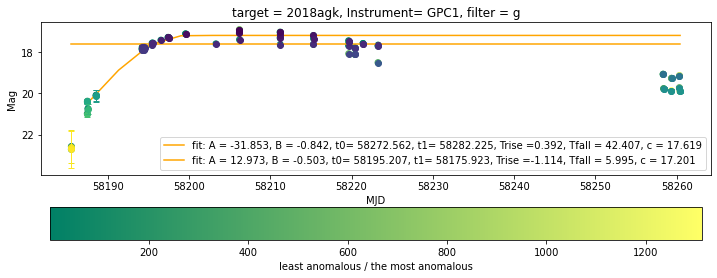

In [2]:
# test for GPC1 in g filter
target = "2018agk"

file_location = file_name(target)
original_data = data(file_location,'g', 'GPC1') # plot based on the the Instrument gp band
original_data1 = data(file_location, 'r', 'GPC1')
time = np.array(original_data[0])
time1 = np.array(original_data1[0]) #MJD

mags = np.array(original_data[1]) 
mags1 = np.array(original_data1[1]) #Mag

mag_errors = np.array(original_data[2]) 
mag_errors1 = np.array(original_data1[2])#Magerr




A = (np.max(mags)-np.min(mags) + (np.max(mags)-np.min(mags))/2) + 10
B = ( - ((np.min(mags) - np.max(mags)) / (time[np.argmin(mags)] - time[np.argmax(mags)])) - 1)
t0 = 58205 #(time[np.argmax(mags)])# x[np.argmin(y)] + 10
t1 = 58218#(time[np.argmax(mags)] + 10)
Trise = 30#time[np.argmin(mags)] - time[np.argmax(mags)]  + 100
Tfall = np.max(time) - t1
c = 17
#B= -((np.max(mags) - np.min(mags)) / (time[np.argmin(mags)] - time[np.argmin(mags)])) - 1
#print(B)
#t0_min = np.min(time)
#print("t0min:", t0_min)

#t0_max = np.argmin(mags)
#print('t0_min:', t0_max)
# print(A)
# print(B)
# print(t0)
# print(t1)
# print(Trise)
# print(Tfall)
# print(c)
guessparam = np.array([A, B, t0, t1, Trise, Tfall,c])

#print(SN_LC(time, A, B, t0, t1,Trise, Tfall, c))
curvefitting_and_plot(SN_LC, x=  time, x1 = time1, y= mags, y1 =mags1, guessparam = guessparam,dy = mag_errors,  dy1= mag_errors1, target_and_filter_inst = 'target = 2018agk, Instrument= GPC1, filter = g' )


#second plots



different amplitdue

[58185.53       58185.91119192 58186.29238384 58186.67357576
 58187.05476768 58187.4359596  58187.81715152 58188.19834343
 58188.57953535 58188.96072727 58189.34191919 58189.72311111
 58190.10430303 58190.48549495 58190.86668687 58191.24787879
 58191.62907071 58192.01026263 58192.39145455 58192.77264646
 58193.15383838 58193.5350303  58193.91622222 58194.29741414
 58194.67860606 58195.05979798 58195.4409899  58195.82218182
 58196.20337374 58196.58456566 58196.96575758 58197.34694949
 58197.72814141 58198.10933333 58198.49052525 58198.87171717
 58199.25290909 58199.63410101 58200.01529293 58200.39648485
 58200.77767677 58201.15886869 58201.54006061 58201.92125253
 58202.30244444 58202.68363636 58203.06482828 58203.4460202
 58203.82721212 58204.20840404 58204.58959596 58204.97078788
 58205.3519798  58205.73317172 58206.11436364 58206.49555556
 58206.87674747 58207.25793939 58207.63913131 58208.02032323
 58208.40151515 58208.78270707 58209.16389899 58209.54509091
 58209.92628283 58210.307

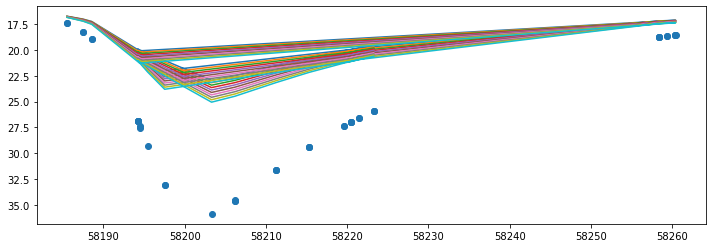

In [3]:
A = 30.038
B = -1.253
t0 = 58196 #(time[np.argmax(mags)])# x[np.argmin(y)] + 10
t1 = 58184#(time[np.argmax(mags)] + 10)
Trise = 2.82#time[np.argmin(mags)] - time[np.argmax(mags)]  + 100
Tfall = 25.198
c = 16.393
time = np.array(original_data[0])
time = np.linspace(time[0],time[-1], 100)
print(time)
#plt.plot(time, SN_LC(time, A, B, t0, t1, Trise, Tfall, c))
target = "2018agk"

file_location = file_name(target)
original_data = data(file_location,'g', 'GPC1') # plot based on the the Instrument gp band
time = np.array(original_data[0]) #MJD
#print(time)
mags = np.array(original_data[1]) #Mag



def Amplitude(no_of_draws = 10):
    A = np.linspace(0.1,5,no_of_draws)
    for i in range(len(A)):
        plt.plot(time , SN_LC(time, A[i], B, t0, t1, Trise, Tfall, c))

    return plt.gca().invert_yaxis()

Amplitude(10)


def Beta(no_of_draws = 10):
    B = np.linspace(-0.,-5 ,no_of_draws)
    for i in range(len(B)):
        plt.plot(time , SN_LC(time, A, B[i], t0, t1 , Trise, Tfall, c))

    return plt.gca().invert_yaxis()
#

#Beta(5)


def t_zero(no_of_draws = 10):
    t0 = np.linspace(58205,58205+200,no_of_draws)
    for i in range(len(t0)):
        plt.plot(time , SN_LC(time, A, B, t0[i], t1, Trise, Tfall, c))

    return plt.gca().invert_yaxis()
plt.gca().invert_yaxis()
plt.scatter(time, SN_LC(time, A, B, t0, t1, Trise, Tfall, c))

def t_1(no_of_draws = 10):
    t1 = np.linspace(58205,58205+200,no_of_draws)
    for i in range(len(t1)):
        plt.plot(time , SN_LC(time, A, B, t0, t1[i], Trise, Tfall, c))

    return plt.gca().invert_yaxis()

plt.gca().invert_yaxis()



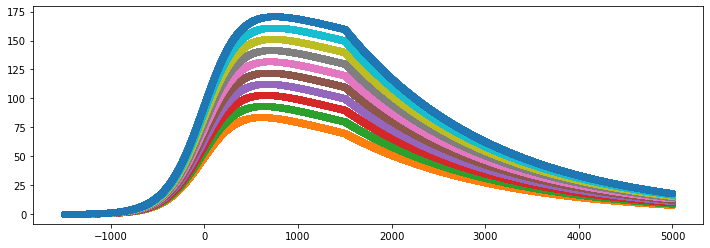

In [4]:
#    plt.gca().invert_yaxis()
#    plt.scatter(time, flux)
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 100
B = -0.02
t0 = 0
t1 = 1500
Trise = 200
Tfall = 1600
c = 0
flux = SN_LC(time, A , B, t0, t1,Trise, Tfall,c)
plt.scatter(time, flux)
for i in range(10):
     flux = SN_LC(time, A + 10*i, B, t0, t1,Trise, Tfall,c)

     plt.scatter(time, flux)
    


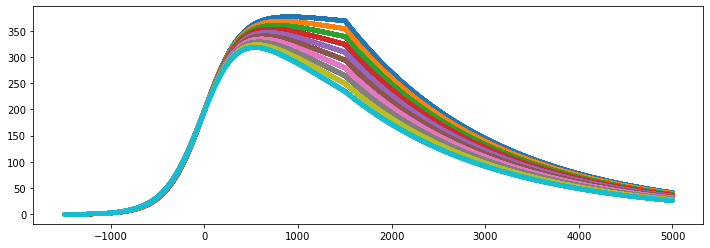

In [5]:
#    plt.gca().invert_yaxis()
#    plt.scatter(time, flux)
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
t1 = 1500
Trise = 200
Tfall = 1600
c = 0
for i in range(10):
     flux = SN_LC(time, A , B - i*0.01, t0, t1,Trise, Tfall,c)
     plt.scatter(time, flux, marker = '.')

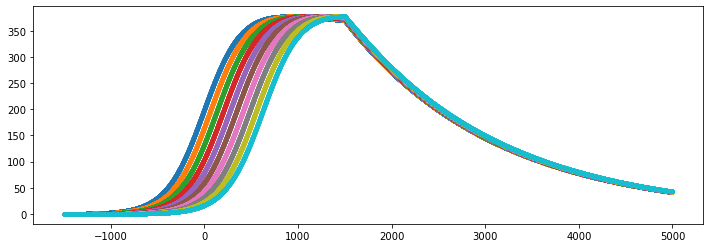

In [6]:
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
for i in range(10):
    flux = SN_LC(time, A , B, t0+70*i, t1,Trise, Tfall, c)
    plt.scatter(time, flux, marker = '.')

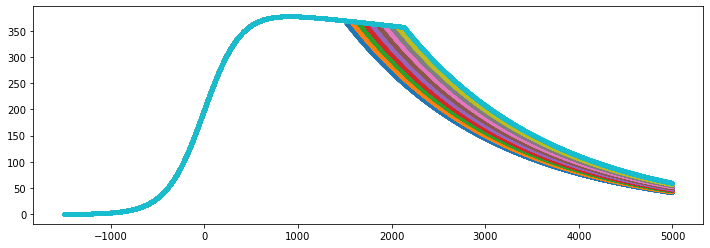

In [7]:
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1+70*i,Trise, Tfall,c)
    plt.scatter(time, flux, marker = '.')

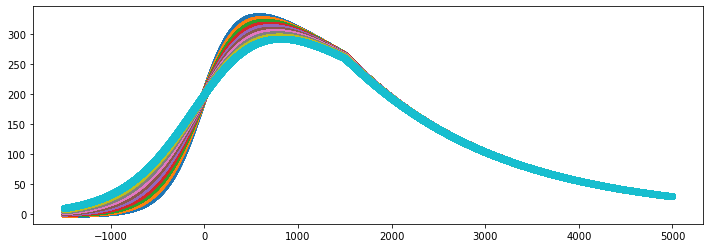

In [8]:
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.09

t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600

for i in range(10):
    flux = SN_LC(time, A , B, t0, t1,Trise+20*i, Tfall,c)

    plt.scatter(time, flux)

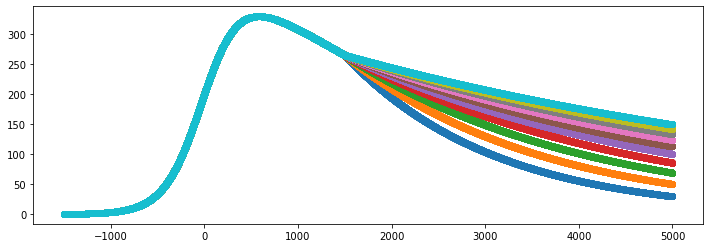

In [9]:
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.09

t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600

for i in range(10):
    flux = SN_LC(time, A , B, t0, t1,Trise, Tfall+500*i,c)

    plt.scatter(time, flux)

In [10]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

####train_x = trainning data = data points 
####train_y = true function = mmodel function
target = '2018agk'
file_location = file_name(target)
MJD_g = data(file_location, 'g', 'GPC1')[0]
MJD_r = data(file_location, 'r', 'GPC1')[0]
MJD_i = data(file_location, 'i', 'GPC1')[0]
MJD_z = data(file_location, 'z', 'GPC1')[0]
mag_g = data(file_location, 'g', 'GPC1')[1]
mag_r = data(file_location, 'r', 'GPC1')[1]
mag_i = data(file_location, 'i', 'GPC1')[1]
mag_z = data(file_location, 'z', 'GPC1')[1]
mag_g_err = data(file_location, 'g', 'GPC1')[2]
mag_r_err = data(file_location, 'r', 'GPC1')[2]
mag_i_err = data(file_location, 'i', 'GPC1')[2]
mag_z_err = data(file_location, 'z', 'GPC1')[2]
all_MJD_data = np.concatenate((MJD_g, MJD_r, MJD_i, MJD_z))
all_mag_data = np.concatenate((mag_g, mag_r, mag_i, mag_z))
all_mag_err_data = np.concatenate((mag_g_err, mag_r_err, mag_i_err))




In [11]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
x_tensor = torch.Tensor(all_MJD_data)
y_tensor = torch.Tensor(all_mag_data)
model = ExactGPModel(x_tensor,y_tensor, likelihood)


# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 10000


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(x_tensor)
    # Calc loss and backprop gradients
    loss = -mll(output, y_tensor)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

/Users/eddie_tang/opt/anaconda3/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


Iter 1/10000 - Loss: 34.700   lengthscale: 0.693   noise: 0.693
Iter 2/10000 - Loss: 34.668   lengthscale: 0.694   noise: 0.694
Iter 3/10000 - Loss: 34.632   lengthscale: 0.694   noise: 0.694
Iter 4/10000 - Loss: 34.592   lengthscale: 0.695   noise: 0.695
Iter 5/10000 - Loss: 34.554   lengthscale: 0.695   noise: 0.695
Iter 6/10000 - Loss: 34.513   lengthscale: 0.696   noise: 0.696
Iter 7/10000 - Loss: 34.484   lengthscale: 0.696   noise: 0.696
Iter 8/10000 - Loss: 34.453   lengthscale: 0.697   noise: 0.697
Iter 9/10000 - Loss: 34.419   lengthscale: 0.697   noise: 0.697
Iter 10/10000 - Loss: 34.378   lengthscale: 0.698   noise: 0.698
Iter 11/10000 - Loss: 34.343   lengthscale: 0.698   noise: 0.698
Iter 12/10000 - Loss: 34.308   lengthscale: 0.699   noise: 0.699
Iter 13/10000 - Loss: 34.275   lengthscale: 0.699   noise: 0.699
Iter 14/10000 - Loss: 34.238   lengthscale: 0.700   noise: 0.700
Iter 15/10000 - Loss: 34.189   lengthscale: 0.700   noise: 0.700
Iter 16/10000 - Loss: 34.165   len

KeyboardInterrupt: 

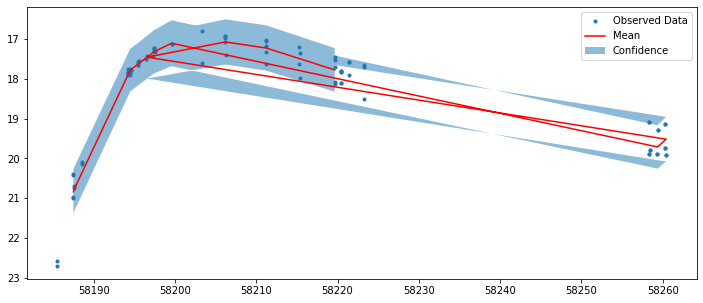

In [ ]:

# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.Tensor(MJD_r)
    observed_pred = likelihood(model(test_x))


with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(12, 5))

    # Get upper and lower confidence bounds
    
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(x_tensor.numpy(), y_tensor.numpy(), '.')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'r')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    
#    ax.set_ylim([17, 23])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])
    ax.invert_yaxis()

In [1]:
# test for GPC1 in g filter
target = "2018agk"

file_location = file_name(target)
 # plot based on the the Instrument gp band
filters = ['g', 'r', 'i', 'z']
Instrument = 'GPC1'
def multi(filters, Instrument, file_location):
    MJD = []
    Mag = []
    Magerr = []
    for i in range(len(filters)):
        all_data = data(file_location = file_location, Filter = filters[i]  , instrument = Instrument)
        MJD.append(all_data[0])
        Mag.append(all_data[1])
        Magerr.append(all_data[2])
    return MJD, Mag, Magerr
for i in range(len(filters)):
    multi(filters = filters, Instrument = Instrument, file_location = file_location)[i-1][i-1]
    

NameError: name 'file_name' is not defined

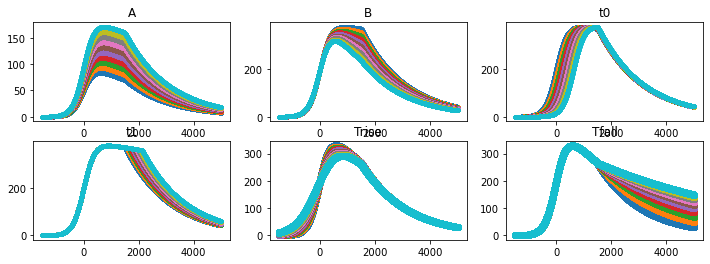

In [ ]:
#subplot
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 100
B = -0.02
t0 = 0
t1 = 1500
Trise = 200
Tfall = 1600
c = 0
plt.subplot(2, 3, 1)
for i in range(10):
     flux = SN_LC(time, A + 10*i, B, t0, t1,Trise, Tfall,c)
     plt.title("A")
     plt.scatter(time, flux, marker='.')
    


time = np.linspace(-1500,5000,10000)
#######Beta
A = 400
B = -0.02
t0 = 0
t1 = 1500
Trise = 200
Tfall = 1600
c = 0
plt.subplot(2, 3, 2)
for i in range(10):
     flux = SN_LC(time, A , B - i*0.01, t0, t1,Trise, Tfall,c)
     plt.title("B")
     plt.scatter(time, flux, marker = '.')


##t0 
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2, 3, 3)
for i in range(10):
    flux = SN_LC(time, A , B, t0+70*i, t1,Trise, Tfall, c)
    plt.title("t0")
    plt.scatter(time, flux, marker = '.')


time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2, 3, 4)
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1+70*i,Trise, Tfall,c)
    plt.title('t1')
    plt.scatter(time, flux, marker = '.')


time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.09

t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2,3,5)
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1,Trise+20*i, Tfall,c)
    plt.title('Trise')     
    plt.scatter(time, flux)



A = 400
B = -0.09

t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2,3,6)
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1,Trise, Tfall+500*i,c)
    plt.title('Tfall') 
    plt.scatter(time, flux)

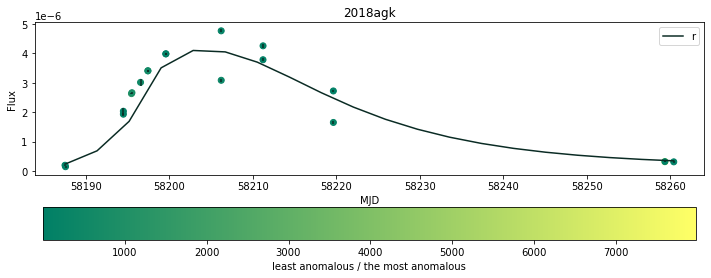

para 0 = 6.301394893571125e-06 +/- 8.399213959279242e-05
para 1 = 3.8454429094577716e-07 +/- 1.0919223738213232e-05
para 2 = 58199.09387284984 +/- 108.90576023506026
para 3 = 58199.58149435445 +/- 36.75613320444668
para 4 = 6.0581268633943015 +/- 111.3025961529923
para 5 = 19.494460543946463 +/- 224.9235921383049
para 6 = -1.5815557133634292e-08 +/- 7.3795935359208345e-06


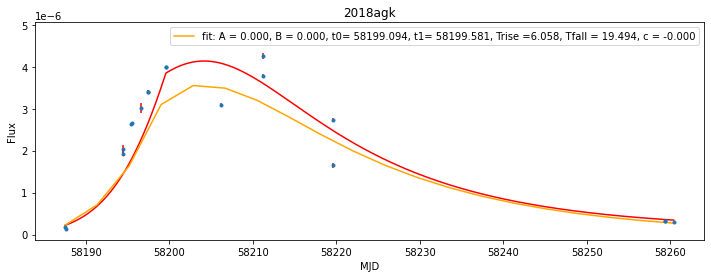

In [1]:
from Test import data
from Test import file_name
from Test import SN_LC
from Test import multi_curvefit
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
from Test import mag_to_flux
from matplotlib.pyplot import figure
from Test import rise1
from Test import fall
from Test import curvefitting_and_plot
from Test import multi
import matplotlib
import matplotlib.cm as cm
from  itertools import islice
from Test import multi_curvefit_test
import species

target = "2018agk"
filters = ['g']
Instrument = 'GPC1'
file_location = file_name(target)
#multi bands could be plotted based 
MJD = multi(filters = filters, Instrument= Instrument, file_location = file_location)[0]
Mag = multi(filters = filters, Instrument= Instrument, file_location = file_location)[1]
Magerr = multi(filters = filters, Instrument= Instrument, file_location = file_location)[2]
flux = mag_to_flux(Mag, Magerr, 'PAN-STARRS/PS1.g')[0]
fluxerr = mag_to_flux(Mag,Magerr,'PAN-STARRS/PS1.g')[1] 
multi_curvefit_test(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)



#g:
# para 0 = 2.1902900441552705e-05 +/- 0.0005227240730011786
# para 1 = 1.6537910011137491e-06 +/- 1.8872856352557447e-05
# para 2 = 58205.60002337154 +/- 165.000608689986
# para 3 = 58199.56887850505 +/- 1.9226166153154625
# para 4 = 8.91126874022141 +/- 24.623076883749942
# para 5 = 7.621536901416368 +/- 22.30579333591251
# para 6 = 1.1427569097472194e-06 +/- 2.8250904418577405e-07


# para 0 = 5.223638241701819e-06 +/- 0.0005586776369293613
# para 1 = 4.587099873991601e-07 +/- 8.736507438872201e-06
# para 2 = 58204.34111997036 +/- 999.7169231471718
# para 3 = 58206.19365550392 +/- 0.00023466398366682903
# para 4 = 26.000580329557543 +/- 378.11632773538383
# para 5 = 6.542222476916067 +/- 7.43199068068169
# para 6 = 1.3063598702982018e-06 +/- 3.0619996498869355e-07



#r:

multi_curvefit(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)

In [ ]:
import math
from matplotlib import pyplot as plt
import torch
import gpytorch
from Test import data
from Test import file_name
from Test import SN_LC
from Test import multi_curvefit
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
from Test import mag_to_flux
from matplotlib.pyplot import figure
from Test import rise1
from Test import fall
from Test import curvefitting_and_plot
from Test import multi
import matplotlib
import matplotlib.cm as cm
from  itertools import islice

target = "2018agk"
filters = ['g']
Instrument = 'GPC1'
file_location = file_name(target)
#multi bands could be plotted based 
MJD = multi(filters = filters, Instrument= Instrument, file_location = file_location)[0]
Mag = multi(filters = filters, Instrument= Instrument, file_location = file_location)[1]
Magerr = multi(filters = filters, Instrument= Instrument, file_location = file_location)[2]
flux = mag_to_flux(Mag, Magerr)[0]
fluxerr = mag_to_flux(Mag,Magerr)[1] 

x_train = torch.




class SpectralMixtureGP(gpytorch.models.ExactGP):
    def __init__(self, x_train, y_train, likelihood):
        super(SpectralMixtureGP, self).__init__(x_train, y_train, likelihood)
        self.mean = gpytorch.means.ConstantMean() # Construct the mean function
        self.cov = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=4) # Construct the kernel function
        self.cov.initialize_from_data(x_train, y_train) # Initialize the hyperparameters from data
        
    def forward(self, x):
        # Evaluate the mean and kernel function at x
        mean_x = self.mean(x)
        cov_x = self.cov(x)
        # Return the multivariate normal distribution using the evaluated mean and kernel function
        return gpytorch.distributions.MultivariateNormal(mean_x, cov_x) 
        
# Initialize the likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = SpectralMixtureGP(x_train, y_train, likelihood)
